### 08. Radiance to Reflectance Conversion using DSL
#### Gyantha R. L. Kodikara, 2023/09/15 @  UWM Updates: 08/03/2024, 31/05/2024

In [1]:
# Import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from osgeo import gdal

In [2]:
# Reflectance values from the white panel at wavelength position of each band for Helo
ReflectancePanel = np.load('ReflectancePanel.npy')
ReflectancePanel[:,2]

array([0.54480948, 0.5226138 , 0.54199094, 0.55654485, 0.54606118])

In [3]:
# Radiance values from the white panel from each image band
RadiancePanel = np.load('RadiancePanelMean.npy')
RadiancePanel[:,2]

array([0.086     , 0.12666666, 0.12763999, 0.10165333, 0.11065334])

In [4]:
# Load DLS irradiances at each band calculated from Worksheet 03
DLS_Irradiances = np.load('DLS_Irradiances.npy')
DLS_Irradiances

array([1.21021362, 1.12057037, 1.00003802, 0.51519669, 0.81628708])

In [5]:
# Load Fresnel correction value calculated from previous step
FresnelCorrection = np.load('Fresnel_correction.npy')
FresnelCorrection

array(0.97444503)

In [6]:
# Load the image
Radiance = np.load('np3DRadiance.npy')
Radiance.shape

(900, 1200, 5)

### Radiance to reflectance conversion using DLS irradiance

In [9]:
# Create empty image
Reflectance_DLS1 = np.zeros((900,1200,5))
Reflectance_DLS1.shape

(900, 1200, 5)

In [10]:
Reflectance_DLS1[:,:,0] = Radiance[:,:,0] * math.pi/DLS_Irradiances[0]
Reflectance_DLS1[:,:,1] = Radiance[:,:,1] * math.pi/DLS_Irradiances[1]
Reflectance_DLS1[:,:,2] = Radiance[:,:,2] * math.pi/DLS_Irradiances[2]
Reflectance_DLS1[:,:,3] = Radiance[:,:,3] * math.pi/DLS_Irradiances[3]
Reflectance_DLS1[:,:,4] = Radiance[:,:,4] * math.pi/DLS_Irradiances[4]
np.save('Pininj_0177_DLS-nopanel_np3D.npy',Reflectance_DLS1)

In [11]:
# Save the correction file
DLS1 = math.pi/DLS_Irradiances
DLS1 = np.array([[DLS1[0],0.],[DLS1[1],0.],[DLS1[2],0.],[DLS1[3],0.],[DLS1[4],0.]])
np.save('Pininj_0177_DLS_nopanel_coeff.npy',DLS1)
DLS1

array([[2.59589928, 0.        ],
       [2.80356569, 0.        ],
       [3.14147322, 0.        ],
       [6.09785102, 0.        ],
       [3.848637  , 0.        ]])

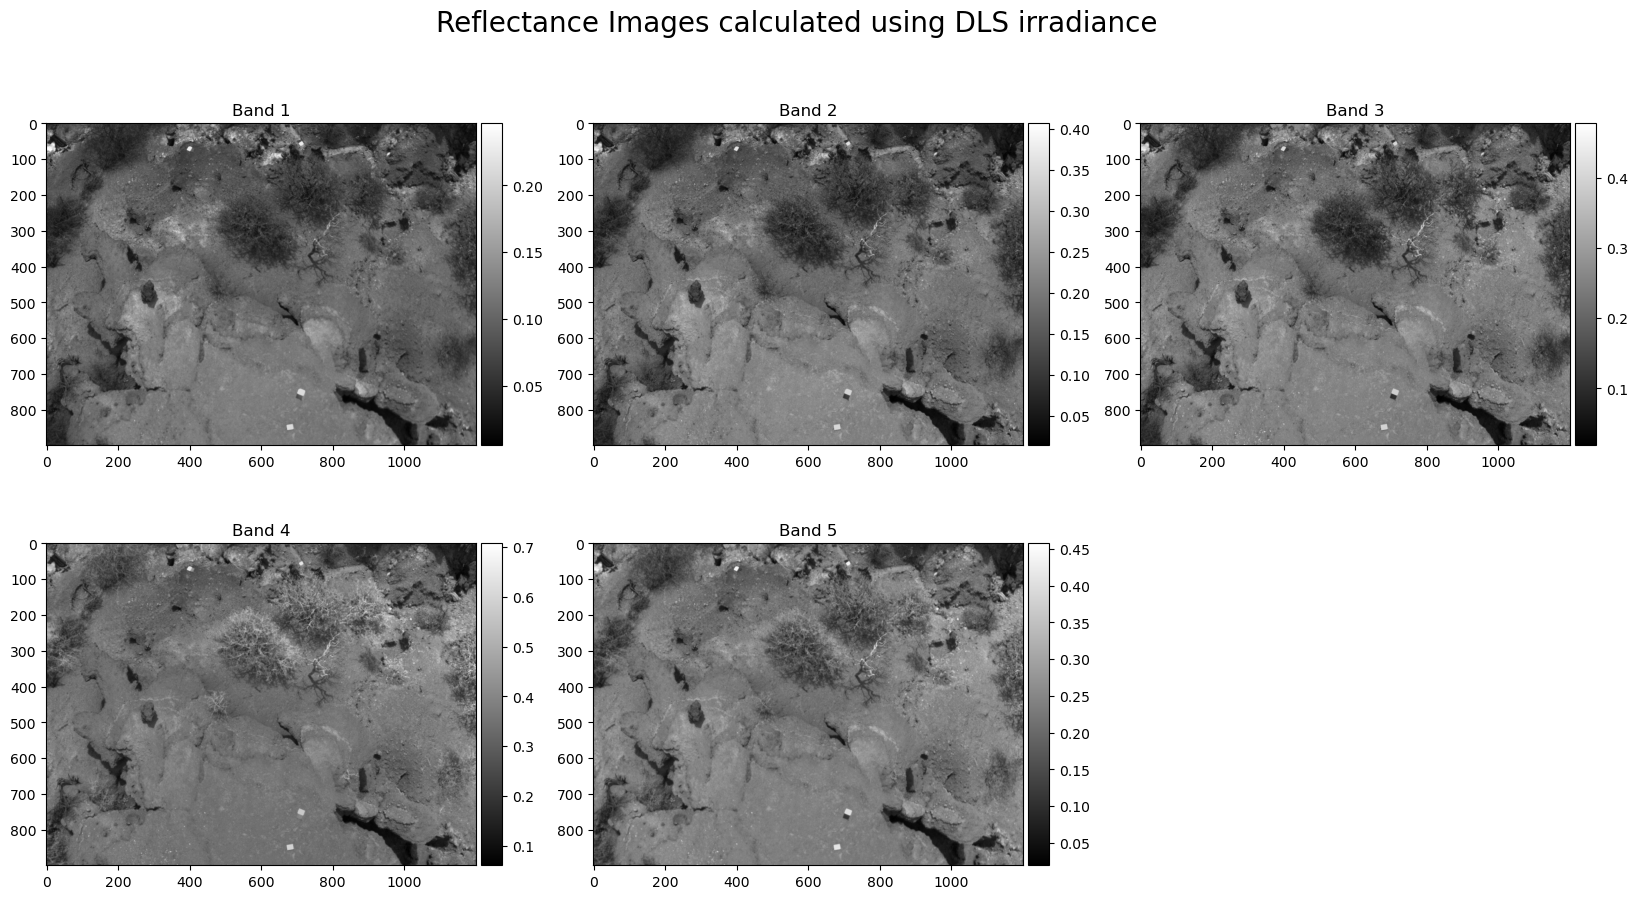

In [12]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(Reflectance_DLS1[:,:,0], cmap='gray')
im2 = ax2.imshow(Reflectance_DLS1[:,:,1], cmap='gray')
im3 = ax3.imshow(Reflectance_DLS1[:,:,2], cmap='gray')
im4 = ax4.imshow(Reflectance_DLS1[:,:,3], cmap='gray')
im5 = ax5.imshow(Reflectance_DLS1[:,:,4], cmap='gray')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Reflectance Images calculated using DLS irradiance', fontsize=20)
plt.show()

In [13]:
def array2geotif(array, out_path):  
    nrows, ncols, nbands = array.shape
    driver = gdal.GetDriverByName('GTiff')
    dataset = driver.Create(out_path, ncols, nrows, nbands, gdal.GDT_Float32)
    for i in range(nbands):
        dataset.GetRasterBand(i+1).WriteArray(array[:,:,i])
    #dataset.SetGeoTransform(gt)
    #dataset.SetProjection(prj)
    dataset.FlushCache()
    dataset = None

In [14]:
array2geotif(Reflectance_DLS1, 'Pininj_0177_DSL_noPanel_Ref.tif')

/home/kodi/.local/lib/python3.9/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


### Radiance to reflectacne conversion using DLS and Panels

In [15]:
# Calculate irradiance from panel from each band
IrradiancePanel = math.pi * RadiancePanel[:,2] / ReflectancePanel[:,2]
IrradiancePanel

array([0.4959109 , 0.76143236, 0.73985161, 0.5738142 , 0.63660945])

In [16]:
# DLS correction
DLS_correction = IrradiancePanel/DLS_Irradiances
DLS_correction

array([0.40977138, 0.67950427, 0.73982349, 1.11377696, 0.77988427])

In [17]:
# Create empty image
Reflectance_DLS2 = np.zeros((900,1200,5))
Reflectance_DLS2.shape

(900, 1200, 5)

In [18]:
# Radiance to Reflectance = Panel Reflectance / Mean Radiance
Reflectance_DLS2[:,:,0] = Radiance[:,:,0] * math.pi/(DLS_Irradiances[0]*DLS_correction[0])
Reflectance_DLS2[:,:,1] = Radiance[:,:,1] * math.pi/(DLS_Irradiances[1]*DLS_correction[1])
Reflectance_DLS2[:,:,2] = Radiance[:,:,2] * math.pi/(DLS_Irradiances[2]*DLS_correction[2])
Reflectance_DLS2[:,:,3] = Radiance[:,:,3] * math.pi/(DLS_Irradiances[3]*DLS_correction[3])
Reflectance_DLS2[:,:,4] = Radiance[:,:,4] * math.pi/(DLS_Irradiances[4]*DLS_correction[4])
np.save('Pininj_0177_DLS_Panel_np3D.npy',Reflectance_DLS2)

In [19]:
array2geotif(Reflectance_DLS2, 'Pininj_0177_DSL_Panel_Ref.tif')

In [20]:
DLS2 = math.pi/(DLS_Irradiances*DLS_correction)
DLS2

array([6.3349941 , 4.12589853, 4.24624695, 5.47493013, 4.93488221])

In [21]:
# Save the correction file
DLS2 = math.pi/(DLS_Irradiances*DLS_correction)
DLS2 = np.array([[DLS2[0],0.],[DLS2[1],0.],[DLS2[2],0.],[DLS2[3],0.],[DLS2[4],0.]])
np.save('Pininj_0177_DLS_noPanel_coeff.npy',DLS2)
DLS2

array([[6.3349941 , 0.        ],
       [4.12589853, 0.        ],
       [4.24624695, 0.        ],
       [5.47493013, 0.        ],
       [4.93488221, 0.        ]])

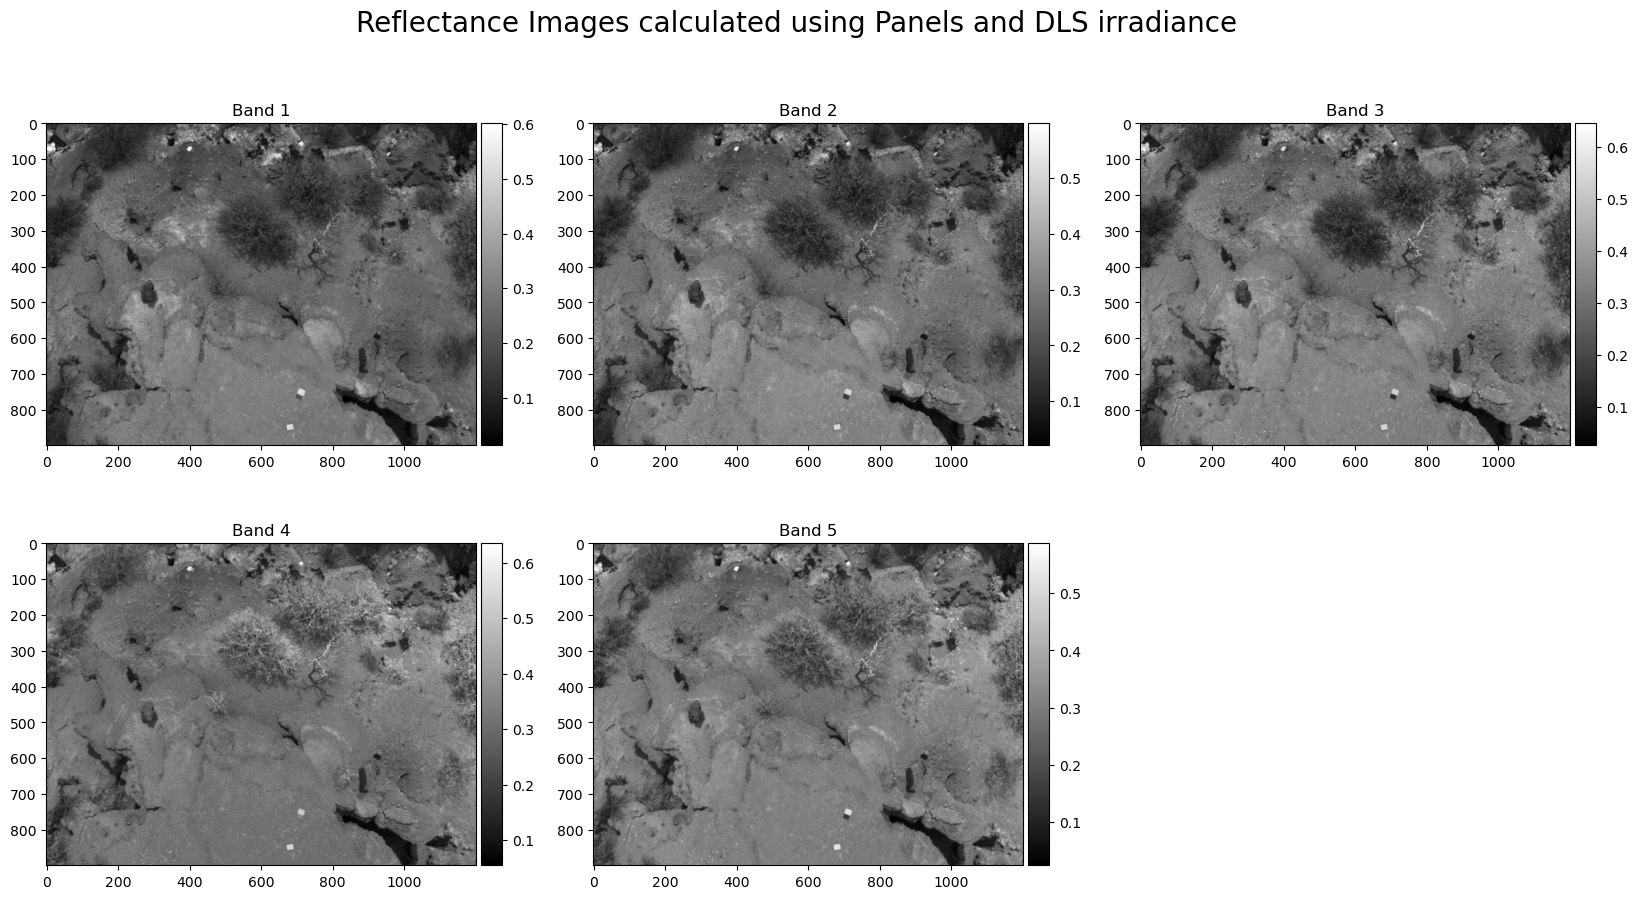

In [22]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(Reflectance_DLS2[:,:,0], cmap='gray')
im2 = ax2.imshow(Reflectance_DLS2[:,:,1], cmap='gray')
im3 = ax3.imshow(Reflectance_DLS2[:,:,2], cmap='gray')
im4 = ax4.imshow(Reflectance_DLS2[:,:,3], cmap='gray')
im5 = ax5.imshow(Reflectance_DLS2[:,:,4], cmap='gray')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Reflectance Images calculated using Panels and DLS irradiance', fontsize=20)
plt.show()